#Imports

In [1]:
import pandas as pd 
import numpy as np
import random 
import ast
from nltk.stem.porter import PorterStemmer
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer 
import nltk
from scipy.sparse.linalg import svds
from sklearn.decomposition import PCA
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
df1= pd.read_csv("Hotel_Reviews.csv")
cv=CountVectorizer(max_features=5000,stop_words='english')
ps=PorterStemmer()

#Functions

In [3]:
def split(frame,new_col_name,position):
  frame[new_col_name]=df1.Hotel_Address.apply(lambda x: x.split(' ')[position])

In [4]:
def rescale(frame,column):
    frame[column]=frame[column]-frame[column].min()
    frame[column]=frame[column]*(10/frame[column].max())
 

In [5]:
def convert(column):
   column=column[0]
   if(type(column) != list):
      return "".join(literal_eval(column))
   else:
      return column

In [6]:
def Stem(text):
  L=[]
  for i in text.split():
    L.append(ps.stem(i))
  return ' '.join(L)

In [7]:
def add_user_input(frame,country,city, description):
 frame.loc[-1] = ['User_Choice',country,city,10,10,10,description,0]
 frame.index = frame.index + 1  # shifting index
 frame.sort_index(inplace=True)

In [8]:
def remove_duplicates(sentence):
    words = sentence.split(" ")
    result = []
    for word in words:
        if word not in result:
            result.append(word)
    return " ".join(result)

In [9]:
def Get_Ids(ids,hlist,frame): 
  for i in hlist:
   ids.append(frame.iloc[i[0]].id)

In [10]:
def getcountry (newframe,oldframe, column,country):
  newframe=oldframe.loc[oldframe[column]==country]

# EDA

## Cleaning

In [11]:
df1.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.duplicated().sum()

526

In [14]:
df1=df1.drop_duplicates()

In [15]:
df1.duplicated().sum()

0

## Reshaping

In [16]:
split(df1,"country",-1)

In [17]:
split(df1,"city",-2)

In [18]:
df1["review"]=df1.Review_Total_Positive_Word_Counts-df1.Review_Total_Negative_Word_Counts

In [19]:
rescale(df1,"review")

In [20]:
rescale(df1,"Total_Number_of_Reviews")

In [21]:
rescale(df1,"Average_Score")

In [22]:
df1.Hotel_Address[1]

' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'

In [23]:
df1.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,country,city,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,5.434783,Hotel Arena,Russia,I am so angry that i made this post available...,397,0.817947,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Amsterdam,0.203562
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,5.434783,Hotel Arena,Ireland,No Negative,0,0.817947,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Amsterdam,6.450382
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,5.434783,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,0.817947,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,Amsterdam,4.847328
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,5.434783,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,0.817947,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,Amsterdam,2.773537
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,5.434783,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,0.817947,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,Amsterdam,3.435115


In [24]:
df1["Tags"]=df1[["Tags"]].apply(convert,axis=1)

In [25]:
cols=['Hotel_Name','country','city','Tags','review','Average_Score','Total_Number_of_Reviews']
df2=df1[cols]
df2.tail()

,Hotel_Name,country,city,Tags,review,Average_Score,Total_Number_of_Reviews
515733,Atlantis Hotel Vienna,Austria,Vienna,Leisure trip Family with older children 2 r...,4.961832,6.304348,1.671979
515734,Atlantis Hotel Vienna,Austria,Vienna,Leisure trip Family with young children Sta...,5.114504,6.304348,1.671979
515735,Atlantis Hotel Vienna,Austria,Vienna,Leisure trip Family with older children 2 r...,4.872774,6.304348,1.671979
515736,Atlantis Hotel Vienna,Austria,Vienna,Leisure trip Group Standard Triple Room St...,5.432570,6.304348,1.671979
515737,Atlantis Hotel Vienna,Austria,Vienna,Leisure trip Family with young children 2 r...,5.025445,6.304348,1.671979


In [26]:
df2=df2.groupby(['Hotel_Name','country','city']).mean()

In [27]:
df3=df1.groupby(['Hotel_Name','country','city'])['Tags'].apply(''.join).reset_index()

In [28]:
df3.head()

,Hotel_Name,country,city,Tags
0,11 Cadogan Gardens,Kingdom,United,Leisure trip Couple Superior Queen Room St...
1,1K Hotel,France,Paris,Leisure trip Couple Superior M Double Room ...
2,25hours Hotel beim MuseumsQuartier,Austria,Vienna,Leisure trip Solo traveler Standard Double ...
3,41,Kingdom,United,Leisure trip Couple Executive King Room wit...
4,45 Park Lane Dorchester Collection,Kingdom,United,Leisure trip Solo traveler Executive Queen ...


In [29]:
data=pd.merge(df2,df3, on=['Hotel_Name','country','city'])

In [30]:
columns=['Hotel_Name','country','city','review','Average_Score','Total_Number_of_Reviews','Tags']
data=data[columns]

In [31]:
data.Tags=data.Tags.apply(remove_duplicates)

In [32]:
data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags
0,11 Cadogan Gardens,Kingdom,United,5.171076,7.608696,0.210501,Leisure trip Couple Superior Queen Room Staye...
1,1K Hotel,France,Paris,4.995788,5.434783,0.372887,Leisure trip Couple Superior M Double Room St...
2,25hours Hotel beim MuseumsQuartier,Austria,Vienna,5.187664,7.826087,2.574728,Leisure trip Solo traveler Standard Double Ro...
3,41,Kingdom,United,5.323378,9.565217,0.120888,Leisure trip Couple Executive King Room with ...
4,45 Park Lane Dorchester Collection,Kingdom,United,5.175391,9.130435,0.015036,Leisure trip Solo traveler Executive Queen Ro...


In [33]:
data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags
0,11 Cadogan Gardens,Kingdom,United,5.171076,7.608696,0.210501,Leisure trip Couple Superior Queen Room Staye...
1,1K Hotel,France,Paris,4.995788,5.434783,0.372887,Leisure trip Couple Superior M Double Room St...
2,25hours Hotel beim MuseumsQuartier,Austria,Vienna,5.187664,7.826087,2.574728,Leisure trip Solo traveler Standard Double Ro...
3,41,Kingdom,United,5.323378,9.565217,0.120888,Leisure trip Couple Executive King Room with ...
4,45 Park Lane Dorchester Collection,Kingdom,United,5.175391,9.130435,0.015036,Leisure trip Solo traveler Executive Queen Ro...


In [34]:
price_list=[10000,20000,30000,40000,50000]

In [35]:
contract_price=[]
for i in range(len(data)):
  num=random.choice(price_list)
  contract_price.append(num)


In [36]:
data['Contract_Price']=contract_price

In [37]:
data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price
0,11 Cadogan Gardens,Kingdom,United,5.171076,7.608696,0.210501,Leisure trip Couple Superior Queen Room Staye...,20000
1,1K Hotel,France,Paris,4.995788,5.434783,0.372887,Leisure trip Couple Superior M Double Room St...,20000
2,25hours Hotel beim MuseumsQuartier,Austria,Vienna,5.187664,7.826087,2.574728,Leisure trip Solo traveler Standard Double Ro...,40000
3,41,Kingdom,United,5.323378,9.565217,0.120888,Leisure trip Couple Executive King Room with ...,20000
4,45 Park Lane Dorchester Collection,Kingdom,United,5.175391,9.130435,0.015036,Leisure trip Solo traveler Executive Queen Ro...,50000


In [38]:
mycols=['Hotel_Name','country','city','review','Average_Score','Total_Number_of_Reviews','Tags','Contract_Price']
data=data[mycols]

In [39]:
data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price
0,11 Cadogan Gardens,Kingdom,United,5.171076,7.608696,0.210501,Leisure trip Couple Superior Queen Room Staye...,20000
1,1K Hotel,France,Paris,4.995788,5.434783,0.372887,Leisure trip Couple Superior M Double Room St...,20000
2,25hours Hotel beim MuseumsQuartier,Austria,Vienna,5.187664,7.826087,2.574728,Leisure trip Solo traveler Standard Double Ro...,40000
3,41,Kingdom,United,5.323378,9.565217,0.120888,Leisure trip Couple Executive King Room with ...,20000
4,45 Park Lane Dorchester Collection,Kingdom,United,5.175391,9.130435,0.015036,Leisure trip Solo traveler Executive Queen Ro...,50000


##Visualizing

###KMeans-Elbow Method

In [40]:
colls=['Average_Score','Total_Number_of_Reviews']

In [41]:
kmeans_data=data[colls]

In [42]:
inertias=[]
silhouettes=[]
r1=[1,2,3,4,5,6,7,8,9,10]
for i in r1:
   km = KMeans(n_clusters=i,random_state=1)
   km.fit(kmeans_data)
   clusters = km.fit_predict(kmeans_data)
   inertias.append(km.inertia_)
  # silhouettes.append(silhouette_score(kmeans_data,clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

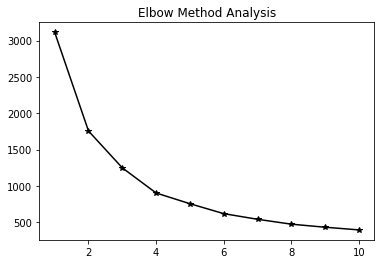

In [43]:
plt.plot(r1, inertias, color='k', marker='*')
plt.title('Elbow Method Analysis')
plt.show()

###KMeans_Silhouette Method

In [44]:
inertias=[]
silhouettes=[]
r2=[2,3,4,5,6,7,8,9,10]
for i in r2:
   km = KMeans(n_clusters=i,random_state=1)
   km.fit(kmeans_data)
   clusters = km.fit_predict(kmeans_data)
   inertias.append(km.inertia_)
   silhouettes.append(silhouette_score(kmeans_data,clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

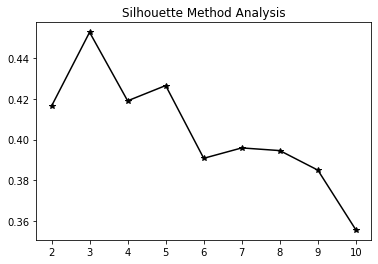

In [45]:
plt.plot(r2, silhouettes, color='k', marker='*')
plt.title('Silhouette Method Analysis')
plt.show()

####K=2

In [46]:
km = KMeans(n_clusters=2)
km.fit(kmeans_data)
label = km.fit_predict(kmeans_data)
u_labels = np.unique(label)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


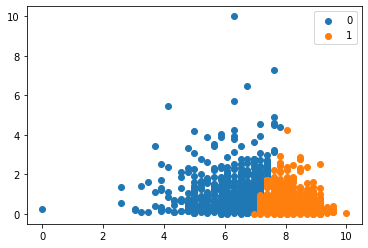

In [47]:
for i in u_labels:
    plt.scatter(kmeans_data.iloc[label == i , 0] , kmeans_data.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

####K=2 clusters visualized

```

```



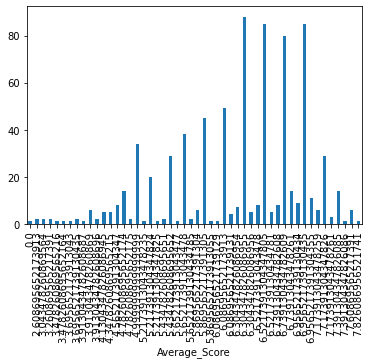

In [48]:
for i in np.unique(label):
    kmeans_data[label==0].groupby('Average_Score').size().plot(kind='bar')

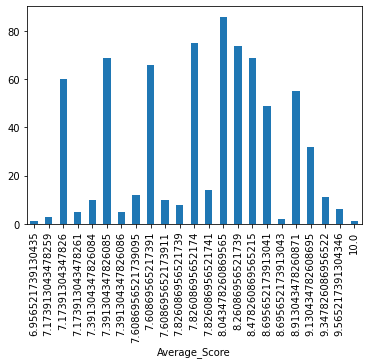

In [49]:
for i in np.unique(label):
    kmeans_data[label==1].groupby('Average_Score').size().plot(kind='bar')

####K=3

In [50]:
km = KMeans(n_clusters=3)
km.fit(kmeans_data)
label = km.fit_predict(kmeans_data)
u_labels = np.unique(label)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


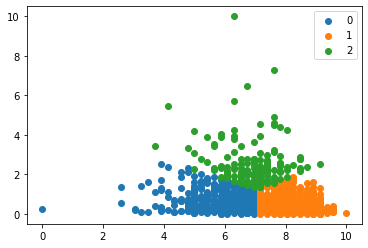

In [51]:
for i in u_labels:
    plt.scatter(kmeans_data.iloc[label == i , 0] , kmeans_data.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

With label 0, majority of hotels have a 5.5 to 7 score

#### K=3 clusters visualized



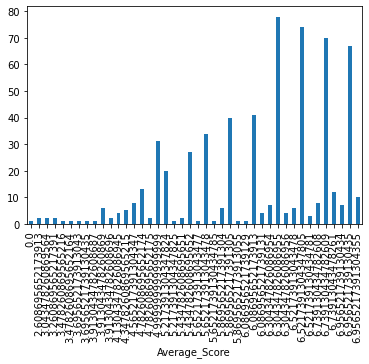

In [52]:
for i in np.unique(label):
    kmeans_data[label==0].groupby('Average_Score').size().plot(kind='bar')

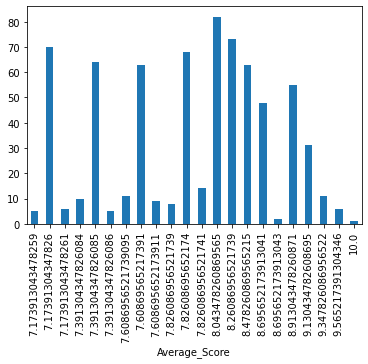

In [53]:
for i in np.unique(label):
    kmeans_data[label==1].groupby('Average_Score').size().plot(kind='bar')

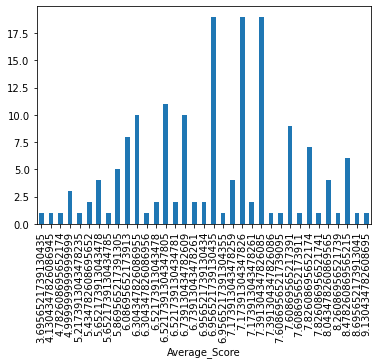

In [54]:
for i in np.unique(label):
    kmeans_data[label==2].groupby('Average_Score').size().plot(kind='bar')

###Bar Graphs

In [55]:
val1=val2=val3=0
for value in data['Average_Score']:
   if value <4:
     val1=val1+1
   elif (value >=4 and value<=7):
      val2=val2+1
   elif (value >7):
     val3=val3+1

<BarContainer object of 3 artists>

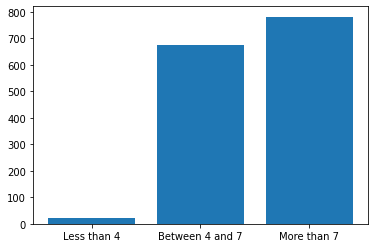

In [56]:
data1=[['Less than 4', val1], ['Between 4 and 7', val2], ['More than 7', val3]]
df = pd.DataFrame(data1, columns=['R', 'Count'])
x=df.R
y=df.Count
plt.bar(x,y)

#User Input

In [57]:
add_user_input(data,"austria","vienna","business")

In [58]:
data['id']=data.index

In [59]:
data["Tags"]=data["Tags"].str.lower()
data["country"]=data["country"].str.lower()
data["city"]=data["city"].str.lower()
data['Hotel_Name']=data['Hotel_Name'].str.lower()

In [60]:
dfcountry=data.loc[data['country']=='austria']

In [61]:
dfcountry.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price,id
0,user_choice,austria,vienna,10.000000,10.000000,10.000000,business,0,0
3,25hours hotel beim museumsquartier,austria,vienna,5.187664,7.826087,2.574728,leisure trip solo traveler standard double ro...,40000,3
19,arcotel kaiserwasser superior,austria,vienna,5.084699,7.391304,0.730138,solo traveler 2 rooms stayed nights submitted...,20000,19
20,arcotel wimberger,austria,vienna,5.112625,6.521739,1.108438,leisure trip family with young children 2 roo...,40000,20
21,azimut hotel vienna,austria,vienna,5.106380,6.521739,0.611656,leisure trip group standard double room staye...,30000,21


# Algorithms

##Cosine Simlarity

In [62]:
unordered_list=[]

###Recommended( Acc to description)

In [63]:
vector1=cv.fit_transform(dfcountry['Tags']).toarray()

In [64]:
similarity=cosine_similarity(vector1)

In [65]:
hotel_list=sorted(list(enumerate(similarity[0])),reverse=True, key=lambda x:x[1])[1:20]

###Recommendation(Acc to description+scores)

Getting IDs of all best hotels according to description to then get the best from this pool according to nummerical factors


In [66]:
hotel_ids=[]
Get_Ids(hotel_ids,hotel_list,dfcountry)

In [67]:
hotel_ids.append(0)

In [68]:
new_data=dfcountry.loc[data['id'].isin(hotel_ids)]

In [69]:
new_data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price,id
0,user_choice,austria,vienna,10.000000,10.000000,10.000000,business,0,0
38,am spiegeln,austria,vienna,4.941233,6.739130,0.118482,business trip solo traveler single room staye...,50000,38
265,das opernring hotel,austria,vienna,5.249948,8.043478,0.736152,leisure trip couple double room stayed 1 nigh...,20000,265
266,das triest hotel,austria,vienna,5.074821,6.304348,0.139532,business trip family with young children juni...,10000,266
333,fourside hotel suites vienna,austria,vienna,5.149549,7.391304,0.663379,business trip solo traveler studio stayed 3 n...,20000,333


In [70]:
vector2=new_data[colls].to_numpy()

In [71]:
similarity2=cosine_similarity(vector2)

In [72]:
final_list=sorted(list(enumerate(similarity2[0])),reverse=True, key=lambda x:x[1])[1:11]

In [73]:
for i in final_list:
  unordered_list.append(new_data.iloc[i[0]].id)
  print(new_data.iloc[i[0]].Hotel_Name,new_data.iloc[i[0]].country,new_data.iloc[i[0]].city)

hotel domizil austria vienna
hotel schild austria vienna
das opernring hotel austria vienna
fourside hotel suites vienna austria vienna
hotel k nig von ungarn austria vienna
graben hotel austria vienna
hotel johann strauss austria vienna
hotel corvinus austria vienna
hotel beethoven wien austria vienna
hotel sacher wien austria vienna


In [74]:
print(unordered_list)

[615, 748, 265, 333, 645, 352, 644, 600, 576, 741]


##Dimension Reduction-PCA

In [75]:
vector3=dfcountry[colls].to_numpy()

In [76]:
PCAvector=np.concatenate((vector1,vector3),axis=1)

In [77]:
PCAvector.shape

(148, 156)

In [78]:
pca = PCA(n_components=None)

In [79]:
dfx_pca = pca.fit(PCAvector)

In [80]:
r=[]
for i in range(len(dfx_pca.explained_variance_ratio_)):
  r.append(i+1)

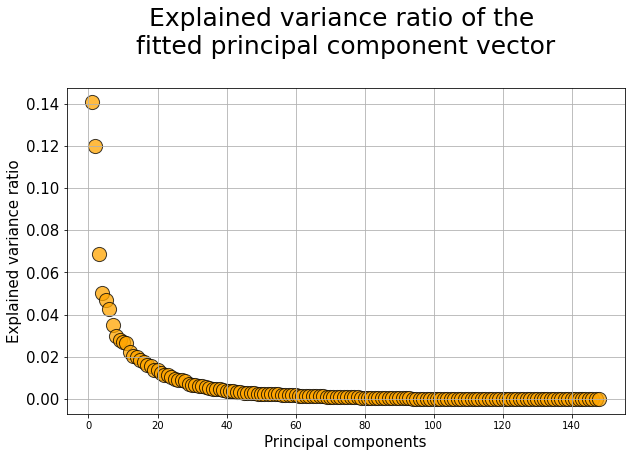

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x=r,
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
#plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [82]:
total=0
for i in range(len(dfx_pca.explained_variance_ratio_)):
    total=total+dfx_pca.explained_variance_ratio_[i]
    if total>0.9:
     n=i
     print(n)
     break

35


In [83]:
PCAdf=pd.DataFrame(PCAvector)

In [84]:
PCAdf.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.826087,2.574728
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.391304,0.730138
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.521739,1.108438
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.521739,0.611656


In [85]:
pca = PCA(n_components=n)

In [86]:
finaldf = pca.fit(PCAvector)

In [87]:
finaldf=pca.transform(PCAdf)

In [88]:
pcasimilarity=cosine_similarity(finaldf)

In [89]:
pcalist=sorted(list(enumerate(pcasimilarity[0])),reverse=True, key=lambda x:x[1])[1:11]

In [90]:
for i in pcalist:
  unordered_list.append(dfcountry.iloc[i[0]].id)
  print(dfcountry.iloc[i[0]].Hotel_Name,dfcountry.iloc[i[0]].country,dfcountry.iloc[i[0]].city)

leonardo hotel vienna austria vienna
hotel de france wien austria vienna
austria trend hotel savoyen vienna austria vienna
25hours hotel beim museumsquartier austria vienna
hotel stefanie austria vienna
austria trend parkhotel sch nbrunn wien austria vienna
austria trend hotel ananas wien austria vienna
austria trend hotel doppio wien austria vienna
austria trend hotel park royal palace vienna austria vienna
hotel erzherzog rainer austria vienna


##Final Result

In [91]:
print(unordered_list)

[615, 748, 265, 333, 645, 352, 644, 600, 576, 741, 902, 791, 93, 3, 758, 94, 84, 88, 91, 622]


In [92]:
unordered_list=[*set(unordered_list)]

In [93]:
ordered_data=dfcountry.loc[data['id'].isin(unordered_list)]

In [94]:
ordered_data.insert(9, 'order_factor', (data.Total_Number_of_Reviews/data.review)*data.Average_Score)

In [95]:
ordered_data=ordered_data.sort_values(by=['order_factor'],ascending=False)

In [96]:
ordered_data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price,id,order_factor
902,leonardo hotel vienna,austria,vienna,5.038937,6.304348,3.807061,leisure trip solo traveler comfort double roo...,10000,902,4.763115
791,hotel de france wien,austria,vienna,5.104256,7.173913,3.087749,leisure trip family with young children speci...,50000,791,4.339759
3,25hours hotel beim museumsquartier,austria,vienna,5.187664,7.826087,2.574728,leisure trip solo traveler standard double ro...,40000,3,3.884223
758,hotel stefanie,austria,vienna,5.257101,8.478261,2.309497,leisure trip group superior double room staye...,10000,758,3.724584
93,austria trend hotel savoyen vienna,austria,vienna,5.194944,8.043478,2.389487,leisure trip couple deluxe room stayed 3 nigh...,20000,93,3.699710


In [97]:
result1=[]
for index,row in ordered_data.iterrows():
  result1.append(row['Hotel_Name'])

In [98]:
ordered_data.insert(10, 'order', range(len(ordered_data)))

In [99]:
ordered_data.head()

,Hotel_Name,country,city,review,Average_Score,Total_Number_of_Reviews,Tags,Contract_Price,id,order_factor,order
902,leonardo hotel vienna,austria,vienna,5.038937,6.304348,3.807061,leisure trip solo traveler comfort double roo...,10000,902,4.763115,0
791,hotel de france wien,austria,vienna,5.104256,7.173913,3.087749,leisure trip family with young children speci...,50000,791,4.339759,1
3,25hours hotel beim museumsquartier,austria,vienna,5.187664,7.826087,2.574728,leisure trip solo traveler standard double ro...,40000,3,3.884223,2
758,hotel stefanie,austria,vienna,5.257101,8.478261,2.309497,leisure trip group superior double room staye...,10000,758,3.724584,3
93,austria trend hotel savoyen vienna,austria,vienna,5.194944,8.043478,2.389487,leisure trip couple deluxe room stayed 3 nigh...,20000,93,3.699710,4


In [100]:
for i, row in ordered_data.iterrows():
  if row['Contract_Price']==10000:
     ordered_data.at[i,'order'] = ordered_data.at[i,'order']-1
  if row['Contract_Price']==20000:
     ordered_data.at[i,'order'] = ordered_data.at[i,'order']-2
  if row['Contract_Price']==30000:
     ordered_data.at[i,'order'] = ordered_data.at[i,'order']-3
  if row['Contract_Price']==40000:
     ordered_data.at[i,'order'] = ordered_data.at[i,'order']-4
  if row['Contract_Price']==50000:
     ordered_data.at[i,'order'] = ordered_data.at[i,'order']-5

In [101]:
ordered_data=ordered_data.sort_values(by=['order'],ascending=True)

In [102]:
result2=[]
for index,row in ordered_data.iterrows():
  result2.append(row['Hotel_Name'])

In [103]:
print("Recommended Hotels without price paid considered")
print(*result1,sep='\n')

Recommended Hotels without price paid considered
leonardo hotel vienna
hotel de france wien
25hours hotel beim museumsquartier
hotel stefanie
austria trend hotel savoyen vienna
austria trend parkhotel sch nbrunn wien
austria trend hotel park royal palace vienna
austria trend hotel ananas wien
hotel erzherzog rainer
austria trend hotel doppio wien
hotel domizil
hotel k nig von ungarn
das opernring hotel
fourside hotel suites vienna
hotel schild
hotel sacher wien
graben hotel
hotel beethoven wien
hotel johann strauss
hotel corvinus


In [104]:
print("Recommended Hotels with price paid considered")
print(*result2,sep='\n')

Recommended Hotels with price paid considered
hotel de france wien
25hours hotel beim museumsquartier
leonardo hotel vienna
hotel stefanie
austria trend hotel savoyen vienna
austria trend hotel ananas wien
hotel erzherzog rainer
austria trend hotel doppio wien
austria trend parkhotel sch nbrunn wien
austria trend hotel park royal palace vienna
hotel domizil
hotel k nig von ungarn
das opernring hotel
fourside hotel suites vienna
hotel schild
hotel sacher wien
hotel beethoven wien
graben hotel
hotel corvinus
hotel johann strauss
